In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [4]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Customer Satisfaction/E-commerce_NPA_Dataset.csv')
data.head()

,CustomerID,Age,Gender,PurchaseAmount,PurchaseFrequency,ProductQualityRating,DeliveryTimeRating,CustomerServiceRating,WebsiteEaseOfUseRating,ReturnRate,DiscountUsage,LoyaltyProgramMember
0,1,38,Female,749.097626,24,2,1,3,5,0.12,135.392573,No
1,2,30,Male,735.224916,18,5,4,4,5,0.37,193.450663,Yes
2,3,55,Male,1145.520305,22,3,5,4,1,0.10,147.246263,Yes
3,4,39,Female,925.460535,14,4,3,2,4,0.38,56.362894,Yes
4,5,51,Male,108.359916,9,3,3,2,5,0.42,338.731055,No


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              500 non-null    int64  
 1   Age                     500 non-null    int64  
 2   Gender                  500 non-null    object 
 3   PurchaseAmount          500 non-null    float64
 4   PurchaseFrequency       500 non-null    int64  
 5   ProductQualityRating    500 non-null    int64  
 6   DeliveryTimeRating      500 non-null    int64  
 7   CustomerServiceRating   500 non-null    int64  
 8   WebsiteEaseOfUseRating  500 non-null    int64  
 9   ReturnRate              500 non-null    float64
 10  DiscountUsage           500 non-null    float64
 11  LoyaltyProgramMember    500 non-null    object 
dtypes: float64(3), int64(7), object(2)
memory usage: 47.0+ KB


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,500.0,250.500000,144.481833,1.000000,125.750000,250.500000,375.250000,500.000000
Age,500.0,44.170000,14.813777,18.000000,32.000000,44.000000,58.000000,69.000000
PurchaseAmount,500.0,1065.050731,583.199658,51.799790,535.083407,1100.884065,1584.348124,1999.655968
PurchaseFrequency,500.0,14.308000,8.151197,1.000000,7.000000,14.000000,22.000000,29.000000
ProductQualityRating,500.0,2.934000,1.410540,1.000000,2.000000,3.000000,4.000000,5.000000
DeliveryTimeRating,500.0,3.008000,1.372481,1.000000,2.000000,3.000000,4.000000,5.000000
CustomerServiceRating,500.0,3.078000,1.415600,1.000000,2.000000,3.000000,4.000000,5.000000
WebsiteEaseOfUseRating,500.0,3.082000,1.415374,1.000000,2.000000,3.000000,4.000000,5.000000
ReturnRate,500.0,0.252280,0.149674,0.000000,0.110000,0.260000,0.380000,0.500000
DiscountUsage,500.0,251.181010,141.531993,0.772696,133.672231,251.940355,371.692341,499.813315


* **Age**: The average customer age is around 44 years, with a range from 18 to 69 years.
* **Purchase Amount**: The average purchase amount is 1065 USD with a significant standard deviation indicating variability in spending <br>
* **Purchase Frequency**: Customers purchase on average about 14 times, with some making up to 29 purchases.<br>
* **Ratings**: The average ratings for product quality, delivery time, customer service, and website ease of use are around 3, indicating moderate satisfaction levels. These ratings range from 1 (poor) to 5 (excellent).<br>
* **Return Rate**: The average return rate is 25%, with some customers having a return rate as high as 50%.<br>
* **Discount Usage**: The average discount usage is around $251, with high variability.

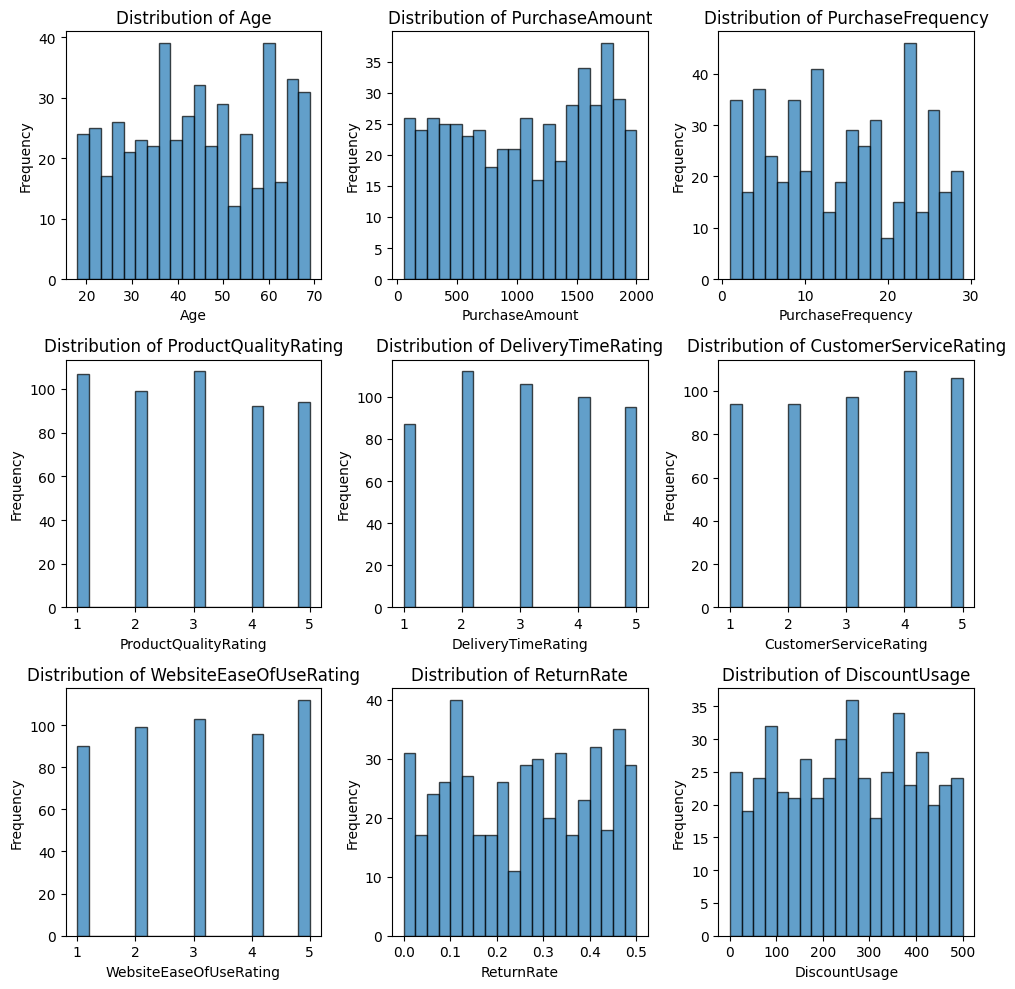

In [7]:
import matplotlib.pyplot as plt

numeric_cols = ['Age', 'PurchaseAmount', 'PurchaseFrequency', 'ProductQualityRating',
                'DeliveryTimeRating', 'CustomerServiceRating', 'WebsiteEaseOfUseRating',
                'ReturnRate', 'DiscountUsage']

plt.figure(figsize=(10, 10))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    plt.hist(data[col], bins=20, edgecolor='k', alpha=0.7)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

* the age distribution is relatively even with slight peaks in the 30s and 60s;
* purchase amounts are right-skewed, indicating most customers spend less than $1000;
* purchase frequency is varied, with notable peaks around 10 and 20 purchases;
* satisfaction ratings for product quality, delivery time, customer service, and website ease of use show a wide distribution, with most ratings clustering around the middle values;
* return rates are varied with peaks around 0.1 and 0.4;
and discount usage is evenly spread, showing no significant trend.

In [8]:
# create age groups
bins = [18, 30, 40, 50, 60, 70]
labels = ['18-29', '30-39', '40-49', '50-59', '60-69']
data['AgeGroup'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

# select only the numeric columns for calculation
numeric_columns = ['ProductQualityRating', 'DeliveryTimeRating', 'CustomerServiceRating', 'WebsiteEaseOfUseRating']

# calculate mean ratings by age group and gender
mean_ratings_age_gender = data.groupby(['AgeGroup', 'Gender'])[numeric_columns].mean()

# reset the index to display the dataframe
mean_ratings_age_gender.reset_index(inplace=True)
mean_ratings_age_gender

<ipython-input-8-9047c25f5194>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_ratings_age_gender = data.groupby(['AgeGroup', 'Gender'])[numeric_columns].mean()


,AgeGroup,Gender,ProductQualityRating,DeliveryTimeRating,CustomerServiceRating,WebsiteEaseOfUseRating
0,18-29,Female,3.052632,3.210526,3.175439,2.912281
1,18-29,Male,2.933333,3.000000,3.333333,3.355556
2,30-39,Female,2.929825,2.859649,2.912281,3.070175
3,30-39,Male,3.080000,2.820000,2.980000,2.880000
4,40-49,Female,3.090909,2.890909,3.036364,3.109091
5,40-49,Male,2.857143,3.166667,3.142857,3.142857
6,50-59,Female,2.945946,2.945946,3.027027,3.162162
7,50-59,Male,2.833333,2.895833,3.312500,3.062500
8,60-69,Female,2.900000,3.300000,3.066667,2.950000
9,60-69,Male,2.673469,2.938776,2.836735,3.285714


* Younger customers (18-29) generally rate product quality slightly higher.
* Females in the 40-49 age group give the highest ratings, while males in the 60-69 age group give the lowest.
* Delivery time satisfaction is relatively consistent across age groups, with minor variations.
* The highest ratings for delivery time satisfaction are from females aged 60-69, while the lowest are from males aged 30-39.
* Customer service ratings are fairly consistent, with a slight peak among younger males (18-29).
* Males in the 60-69 age group rate customer service the lowest.

<Figure size 800x400 with 0 Axes>

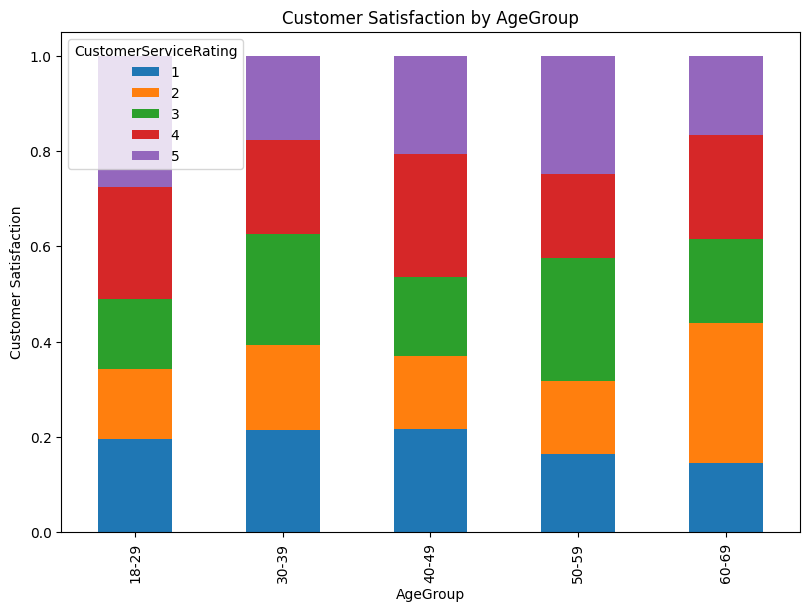

<Figure size 800x400 with 0 Axes>

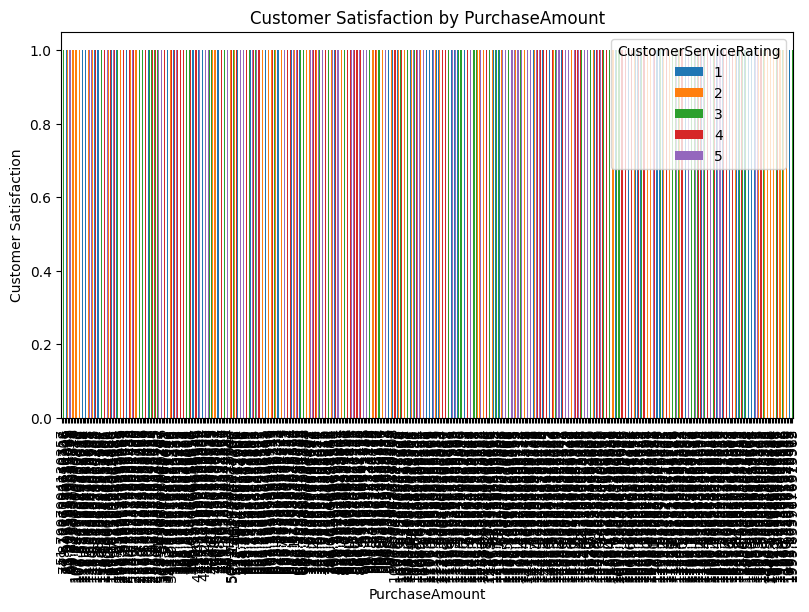

<Figure size 800x400 with 0 Axes>

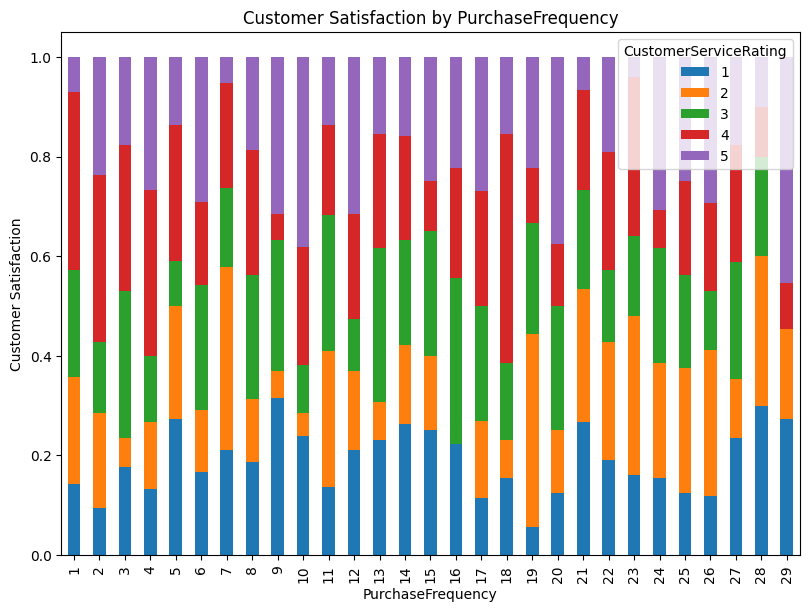

<Figure size 800x400 with 0 Axes>

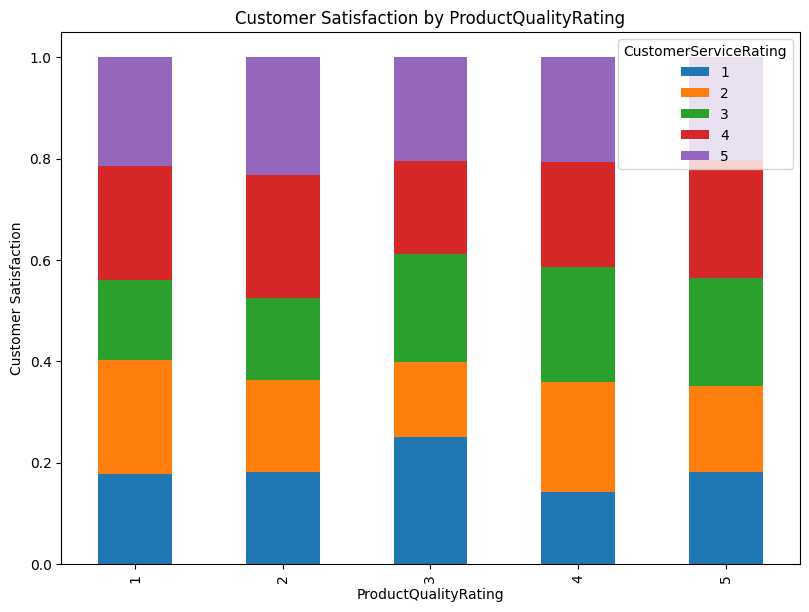

<Figure size 800x400 with 0 Axes>

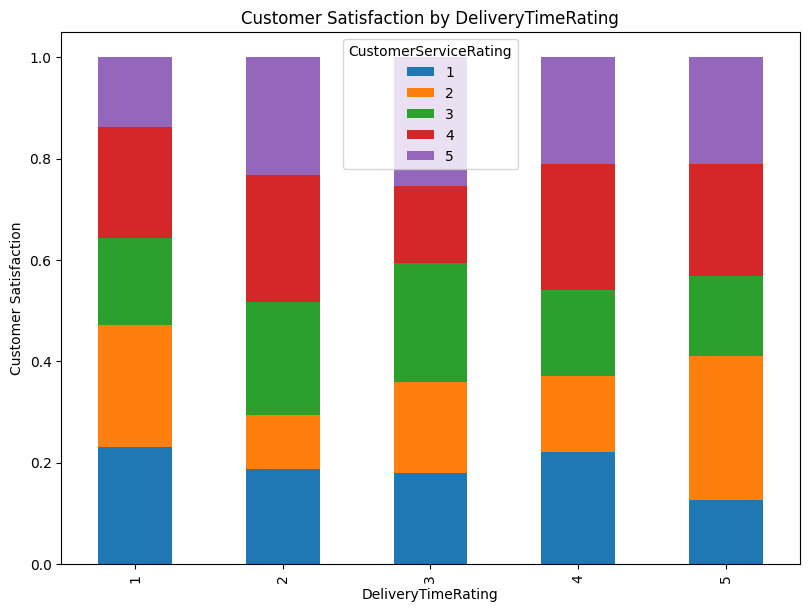

<Figure size 800x400 with 0 Axes>

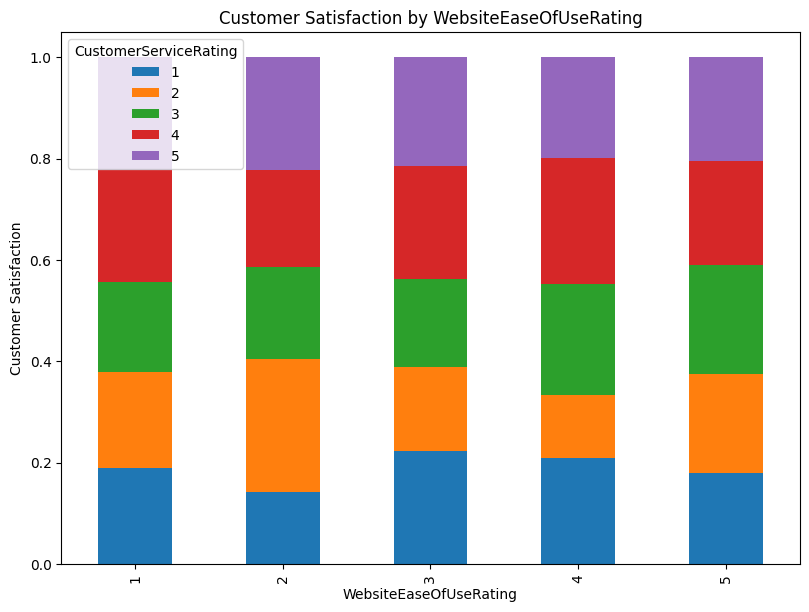

In [30]:
cross_attribs = ['AgeGroup', 'PurchaseAmount', 'PurchaseFrequency', 'ProductQualityRating',
                'DeliveryTimeRating', 'WebsiteEaseOfUseRating']

for col in cross_attribs:
    plt.figure(figsize=(8, 4))
    cross_tab = pd.crosstab(data[col], data['CustomerServiceRating'],normalize = 'index')
    cross_tab.plot(kind='bar', stacked=True, figsize=(8,6))
    plt.tight_layout()
    plt.title(f'Customer Satisfaction by {col}')
    plt.xlabel(col)
    plt.ylabel('Customer Satisfaction')
    plt.show()


In [9]:
# Explore the loyalty program

In [10]:
# select only the numeric columns for calculation
numeric_columns = ['ProductQualityRating', 'DeliveryTimeRating', 'CustomerServiceRating', 'WebsiteEaseOfUseRating', 'ReturnRate', 'DiscountUsage']

# calculate mean ratings by loyalty program membership
mean_ratings_loyalty = data.groupby('LoyaltyProgramMember')[numeric_columns].mean().round(1)

# reset the index to display the dataframe
mean_ratings_loyalty.reset_index(inplace=True)
mean_ratings_loyalty

,LoyaltyProgramMember,ProductQualityRating,DeliveryTimeRating,CustomerServiceRating,WebsiteEaseOfUseRating,ReturnRate,DiscountUsage
0,No,2.9,2.9,3.0,3.1,0.3,241.4
1,Yes,2.9,3.1,3.2,3.1,0.3,260.1


* Product Quality Rating: Loyalty program members rate product quality slightly higher (2.95) compared to non-members (2.92).
* Delivery Time Rating: Loyalty program members are more satisfied with delivery time (3.09) than non-members (2.92).
* Customer Service Rating: Members rate customer service higher (3.16) compared to non-members (2.99).
* Website Ease of Use Rating: Non-members rate the website slightly higher (3.11) than members (3.06).
* Return Rate: The return rates are almost identical between members (0.25) and non-members (0.25).
* Discount Usage: Members use slightly more discounts (\$260) compared to non-members (\$241).

**Net Promoter Score**<br>
NPS is a metric used to gauge customer loyalty and satisfaction by asking customers how likely they are to recommend a company’s product or service to others on a scale of 0 to 10. Respondents are classified into three categories:<br>


1. Promoters (9-10)
2. Passives (7-8)
3. Detractors (0-6)<br>

The NPS is calculated by subtracting the percentage of Detractors from the percentage of Promoters. A higher NPS indicates more customer loyalty and positive word-of-mouth, which are critical for business growth. To calculate the NPS, we use customer service ratings as a proxy for overall satisfaction.

In [11]:
# define NPS categories based on customer service rating
data['NPS_Category'] = pd.cut(data['CustomerServiceRating'], bins=[0, 6, 8, 10], labels=['Detractors', 'Passives', 'Promoters'], right=False)

# calculate NPS
nps_counts = data['NPS_Category'].value_counts(normalize=True) * 100
nps_score = nps_counts['Promoters'] - nps_counts['Detractors']

nps_counts

,proportion
NPS_Category,
Detractors,100.0
Passives,0.0
Promoters,0.0


This results in an NPS score of -100, so extremely low customer satisfaction. This score is a critical indicator that significant improvements are needed in customer service to convert detractors into promoters.<br>

**Root Cause Analysis for Low Satisfaction**<br>
We perform a root cause analysis on customer dissatisfaction by identifying the key factors contributing to low ratings in specific areas such as product quality, delivery time, customer service, and website ease of use. We analyze the characteristics of customers who provide low ratings and look for patterns that can identify the root causes of dissatisfaction.<br>

We perform root cause analysis for low ratings by identifying the customers with low ratings and analyzing the characteristics of these customers. We’ll create subsets of the data where ratings are low (1 or 2) for product quality, delivery time, customer service, and website ease of use:

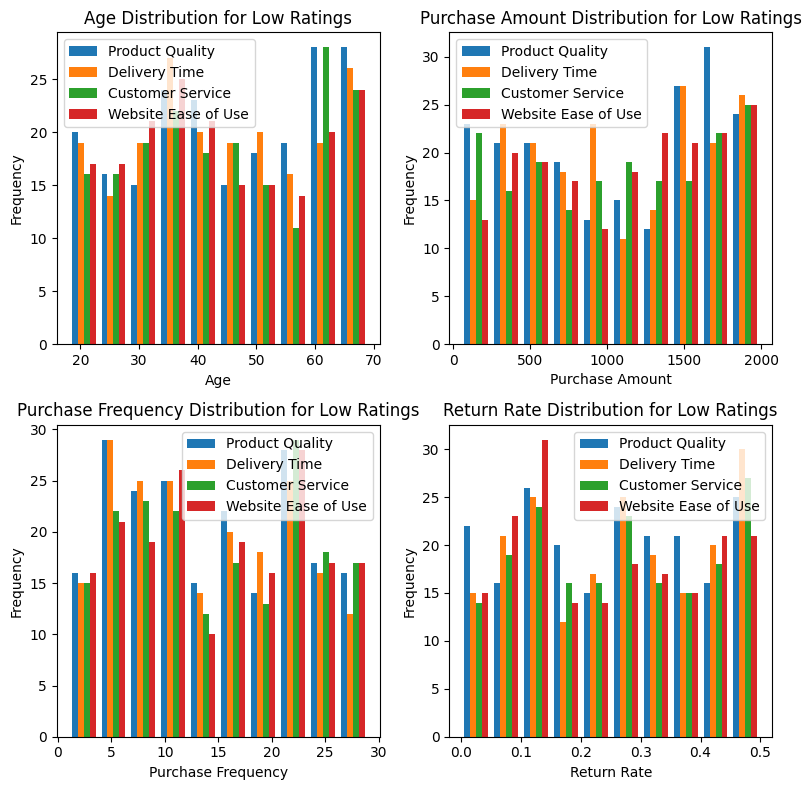

In [18]:
# define low rating threshold
low_rating_threshold = 2

# create subsets for low ratings in different aspects
low_product_quality = data[data['ProductQualityRating'] <= low_rating_threshold]
low_delivery_time = data[data['DeliveryTimeRating'] <= low_rating_threshold]
low_customer_service = data[data['CustomerServiceRating'] <= low_rating_threshold]
low_website_ease_of_use = data[data['WebsiteEaseOfUseRating'] <= low_rating_threshold]

# plot the characteristics for each low rating subset
plt.figure(figsize=(8, 8))

# age distribution for low ratings
plt.subplot(2, 2, 1)
plt.hist([low_product_quality['Age'], low_delivery_time['Age'], low_customer_service['Age'], low_website_ease_of_use['Age']], bins=10, label=['Product Quality', 'Delivery Time', 'Customer Service', 'Website Ease of Use'])
plt.title('Age Distribution for Low Ratings')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()

# purchase amount distribution for low ratings
plt.subplot(2, 2, 2)
plt.hist([low_product_quality['PurchaseAmount'], low_delivery_time['PurchaseAmount'], low_customer_service['PurchaseAmount'], low_website_ease_of_use['PurchaseAmount']], bins=10, label=['Product Quality', 'Delivery Time', 'Customer Service', 'Website Ease of Use'])
plt.title('Purchase Amount Distribution for Low Ratings')
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')
plt.legend()

# purchase frequency distribution for low ratings
plt.subplot(2, 2, 3)
plt.hist([low_product_quality['PurchaseFrequency'], low_delivery_time['PurchaseFrequency'], low_customer_service['PurchaseFrequency'], low_website_ease_of_use['PurchaseFrequency']], bins=10, label=['Product Quality', 'Delivery Time', 'Customer Service', 'Website Ease of Use'])
plt.title('Purchase Frequency Distribution for Low Ratings')
plt.xlabel('Purchase Frequency')
plt.ylabel('Frequency')
plt.legend()

# return rate distribution for low ratings
plt.subplot(2, 2, 4)
plt.hist([low_product_quality['ReturnRate'], low_delivery_time['ReturnRate'], low_customer_service['ReturnRate'], low_website_ease_of_use['ReturnRate']], bins=10, label=['Product Quality', 'Delivery Time', 'Customer Service', 'Website Ease of Use'])
plt.title('Return Rate Distribution for Low Ratings')
plt.xlabel('Return Rate')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

The histograms indicate several key insights for root cause analysis of low ratings across different aspects of customer satisfaction. Customers giving low ratings span a wide age range, with notable peaks around ages 30-40 and 50-60, which suggests age-related dissatisfaction trends. Purchase amount and frequency distributions reveal that low ratings are not limited to low spenders or infrequent buyers; even high spenders and frequent buyers express dissatisfaction, which shows service quality issues. The return rate distribution shows that higher return rates correlate with low ratings, particularly for product quality and website ease of use, which indicates dissatisfaction with product and website experiences.